In [ ]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [ ]:
project_name ='05-cifar10-cnn'

In [ ]:
#data set download
dataset_url ="https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url,'.')

Using downloaded and verified file: ./cifar10.tgz


In [ ]:
# Extract from achive
with tarfile.open('./cifar10.tgz','r:gz') as tar:
  tar.extractall(path='./data')

In [ ]:
data_dir ='./data/cifar10'
print(os.listdir(data_dir))

classes = os.listdir(data_dir+"/train")
print(classes)

['test', 'train']
['cat', 'automobile', 'ship', 'frog', 'airplane', 'truck', 'bird', 'horse', 'dog', 'deer']


In [ ]:
# we want to the no of images in the ariplanes
#
airplane_files = os.listdir(data_dir+"/train/airplane")
print(f'No of training examples for ariplanes : {len(airplane_files)}')

print(airplane_files[:5])

No of training examples for ariplanes : 5000
['4898.png', '1958.png', '2289.png', '4664.png', '4150.png']


In [ ]:
ship_test_files = os.listdir(data_dir+"/test/ship")
print(f'No of test examples for ship_test_files : {len(ship_test_files)}')

print(ship_test_files[:5])

No of test examples for ship_test_files : 1000
['0890.png', '0458.png', '0575.png', '0926.png', '0249.png']


### ImageFolder
We can use the ImageFolder class from TorchVision to load data as Pytorch tensors

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor


In [ ]:
dataset = ImageFolder(data_dir+'/train',transform=ToTensor())

In [ ]:
img,label = dataset[1]
print(img.shape,label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.4941, 0.4784, 0.4941,  ..., 0.4863, 0.4706, 0.4588],
         [0.4784, 0.4667, 0.4745,  ..., 0.4863, 0.4784, 0.4588],
         [0.4784, 0.4745, 0.4745,  ..., 0.4941, 0.4824, 0.4745],
         ...,
         [0.4941, 0.4941, 0.5020,  ..., 0.5216, 0.4784, 0.4471],
         [0.4902, 0.4941, 0.4980,  ..., 0.5020, 0.4745, 0.4471],
         [0.4824, 0.4824, 0.4941,  ..., 0.5020, 0.4941, 0.4745]],

        [[0.4627, 0.4510, 0.4667,  ..., 0.4627, 0.4471, 0.4353],
         [0.4510, 0.4392, 0.4471,  ..., 0.4627, 0.4549, 0.4353],
         [0.4510, 0.4471, 0.4471,  ..., 0.4706, 0.4588, 0.4510],
         ...,
         [0.4627, 0.4627, 0.4706,  ..., 0.4902, 0.4471, 0.4157],
         [0.4588, 0.4627, 0.4667,  ..., 0.4706, 0.4431, 0.4157],
         [0.4510, 0.4510, 0.4627,  ..., 0.4667, 0.4627, 0.4431]],

        [[0.4314, 0.4235, 0.4353,  ..., 0.4157, 0.4000, 0.3882],
         [0.4196, 0.4078, 0.4157,  ..., 0.4157, 0.4078, 0.3882],
         [0.4196, 0.4157, 0.4157,  ..., 0.4235, 0.4118, 0.

In [ ]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## Image show
- we get image size [3,32,32] where 3 means channels (BGR)
- in matplot lib channel accept in the last ,
- we achive it by using of .permute() method

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor']='#ffffff'

In [ ]:
def show_examples(img,label):
  print('Label : ',dataset.classes[label],"("+str(label)+")")
  plt.imshow(img.permute(1,2,0))

Label :  airplane (0)


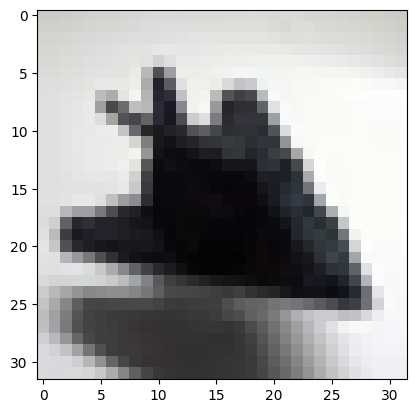

In [ ]:
img,label=dataset[0]
show_examples(img,label)

Label :  airplane (0)


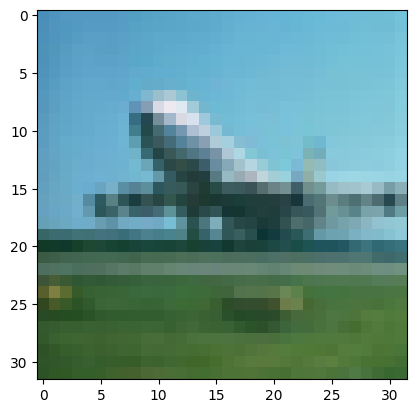

In [ ]:
img,label=dataset[100]
show_examples(img,label)

Label :  airplane (0)


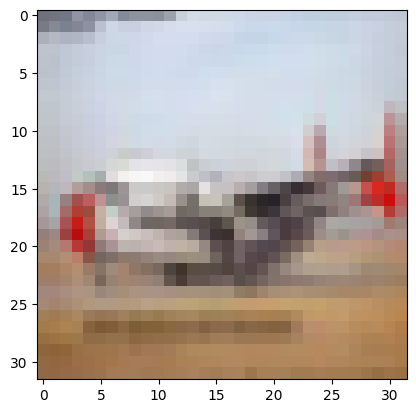

In [ ]:
show_examples(*dataset[1099])

### Training and Validation Datasets
- Training set
- Validation set
- Test set

In [ ]:
random_seed = 42
torch.manual_seed(random_seed)

In [ ]:
val_size = 5000
train_size = len(dataset) - val_size

train_ds,val_ds = random_split(dataset,[train_size,val_size])
len(train_ds),len(val_ds)

(45000, 5000)

In [ ]:
from torch.utils.data.dataloader import DataLoader
batch_size = 128

In [ ]:
train_dl = DataLoader(train_ds,batch_size , shuffle = True , num_workers=4,pin_memory=True)